# Simulation of neutral evolution in populations of different sizes
We consider the evolution of a neutral allele starting at frequency 50%.

## Useful functions

In [48]:
import numpy as np
from cycler import cycler
import matplotlib.pyplot as plt
from pylab import rcParams


numIndividuals = 100



def generation (genolist):
    newGenos = list()
    length = len(genolist)
    selection = np.random.choice(length, length)
    for i in range(length):
        newGenos.append(genolist[selection[i]])
    return(newGenos)


#############################
def simulate (numIndividuals, numGenerations, numPopulations):
    # Two alleles: true and false
    init = [True]*int(numIndividuals/2) + [False] * int(numIndividuals/2)
    allFreqs = list()
    for pop in range(numPopulations):
        freqs = list()
        freqs.append(sum(init)/ numIndividuals)
        current = init
        for gen in range(numGenerations):
            new = generation(current)
            freqs.append(sum(new) / numIndividuals)
            current = new
        allFreqs.append(freqs)
    return allFreqs



def plotFreqs (allFreqs):
    %matplotlib inline
    rcParams['figure.figsize'] = 18, 8
    rcParams['xtick.labelsize'] = 20 
    rcParams['ytick.labelsize'] = 20 
    plt.ylim([0,1.0])
    plt.suptitle('Allele frequency over generations', fontsize=20, fontweight='bold')
    plt.rc('lines', linewidth=2)
    plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y'])))
    # +  cycler('linestyle', ['-', '--', ':', '-.'])))
    for i in range(len(allFreqs)):
        plt.plot (allFreqs[i]) #(position, coverage, 'r-')
    plt.xlabel ('Generation', fontsize=18)
    plt.ylabel ('Allele frequency', fontsize=18)
    #plt.tight_layout()



## Neutral evolution in a small population of 20 individuals

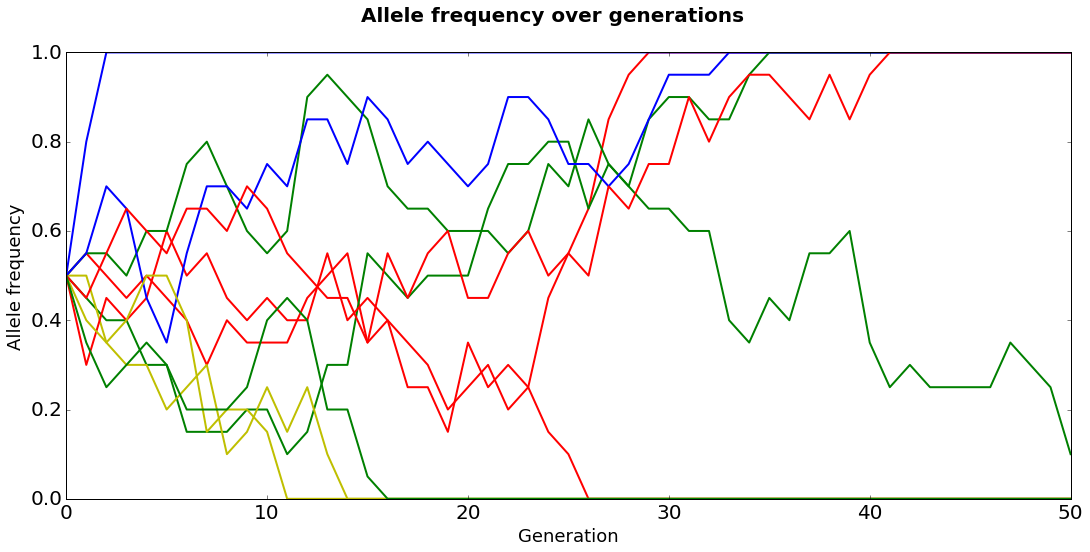

In [49]:
plotFreqs(simulate (20, 50, 10))

## Neutral evolution in a larger population of 200 individuals

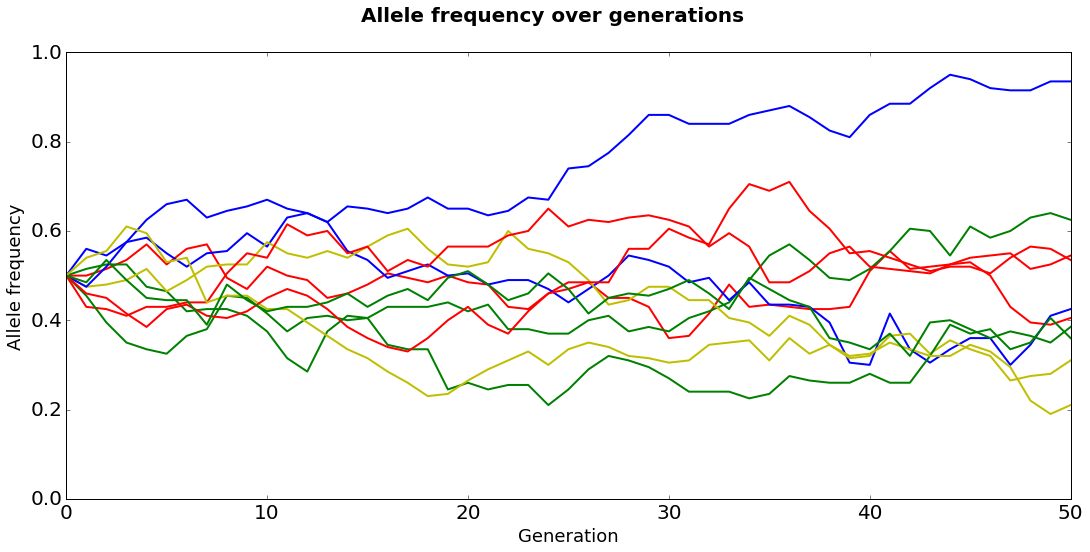

In [51]:
plotFreqs(simulate (200, 50, 10))

## Neutral evolution in an even larger population of size 2000

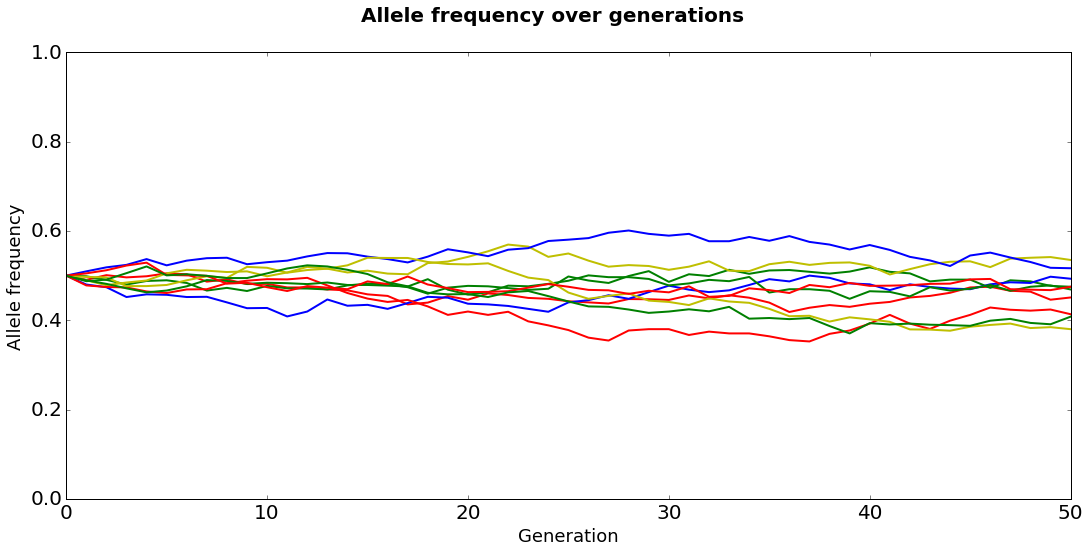

In [53]:
plotFreqs(simulate (2000, 50, 10))

# Simulation of evolution under natural selection in poplations of different sizes
Same idea as above, except that the "True" allele now has a selective advantage of 5%.

In [63]:
def generationSelection (genolist):
    newGenos = list()
    length = len(genolist)
    weights = list()
    for i in range(length):
        if genolist[i]:
            weights.append(1.05)
        else:
            weights.append(1.0)
    probas = [weights[i]/sum(weights) for i in range(len(weights))]
    newGenos = np.random.choice(genolist, length, p=probas)
    return(newGenos)

#############################
def simulateSelection (numIndividuals, numGenerations, numPopulations):
    # Two alleles: true and false
    init = [True]*int(numIndividuals/2) + [False] * int(numIndividuals/2)
    allFreqs = list()
    for pop in range(numPopulations):
        freqs = list()
        freqs.append(sum(init)/ numIndividuals)
        current = init
        for gen in range(numGenerations):
            new = generationSelection(current)
            freqs.append(sum(new) / numIndividuals)
            current = new
        allFreqs.append(freqs)
    return allFreqs




## Selection in a population of 20 individuals

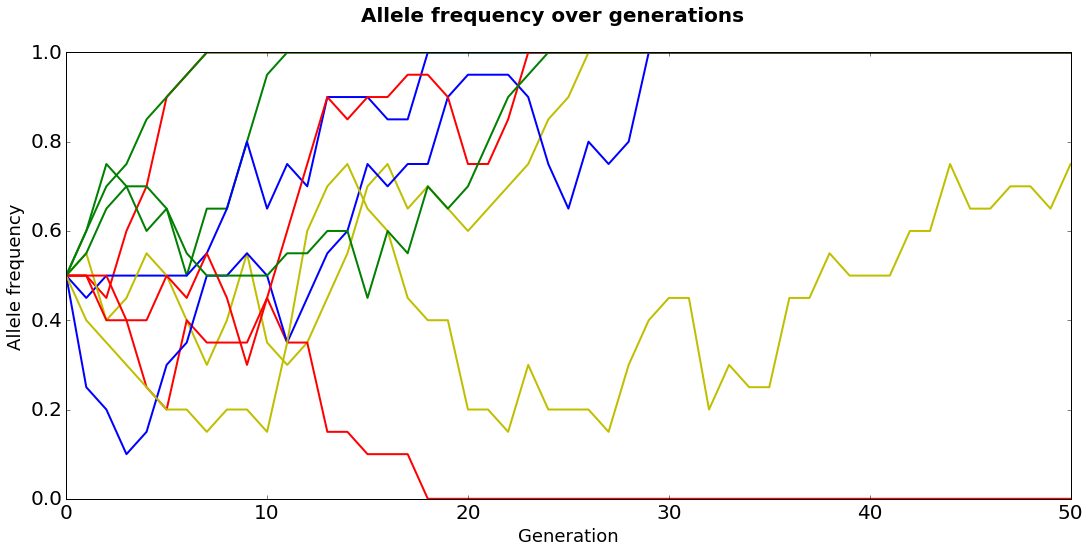

In [64]:
plotFreqs(simulateSelection (20, 50, 10))

## Selection in a population of 200 individuals

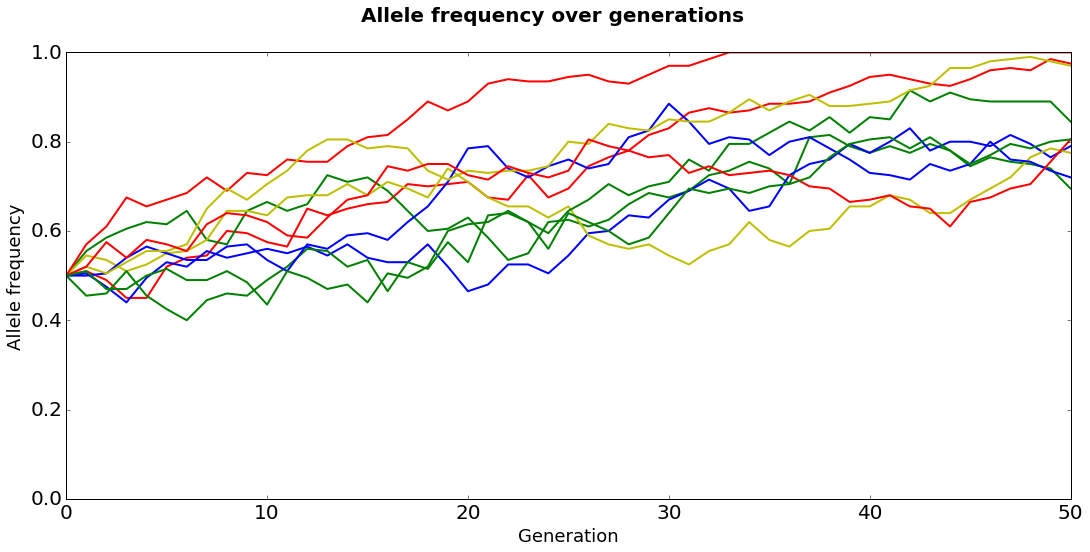

In [65]:
plotFreqs(simulateSelection (200, 50, 10))

## Selection in a population of 2000 individuals

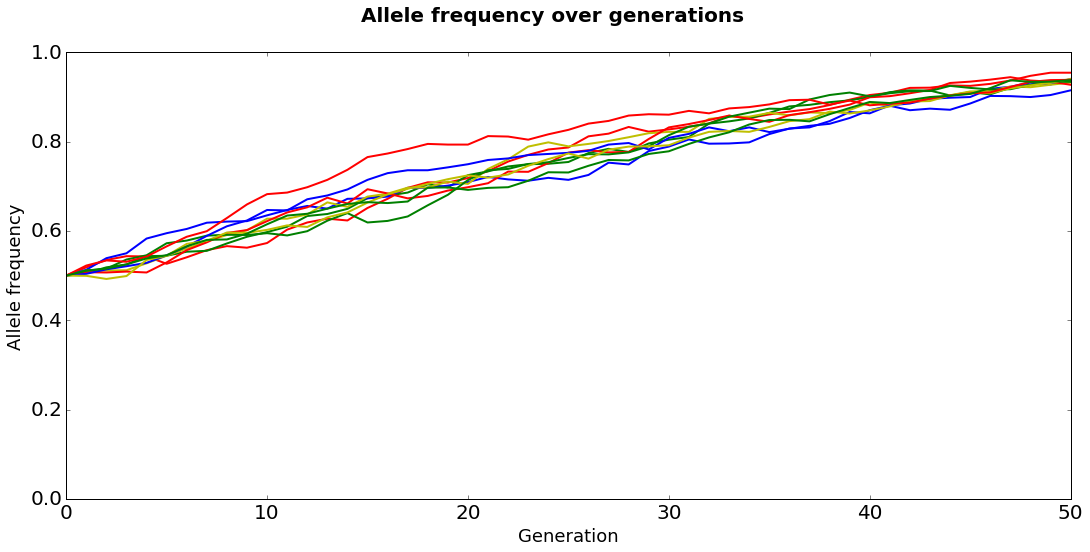

In [68]:
plotFreqs(simulateSelection (2000, 50, 10))